<a href="https://colab.research.google.com/github/jenny005/Machine-Learning/blob/master/StockForecastingwithGARCH_Conocophillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch


     |████████████████████████████████| 798kB 6.0MB/s 


In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Chevron Volatility**

In [21]:
start = datetime(2015, 1, 1)
end = datetime(2020, 11, 16)

In [22]:
cop = web.DataReader('COP', 'yahoo', start=start, end=end)

In [23]:
returns = 100 * cop.Close.pct_change().dropna()

Text(0.5, 1.0, 'Conocophillips Returns')

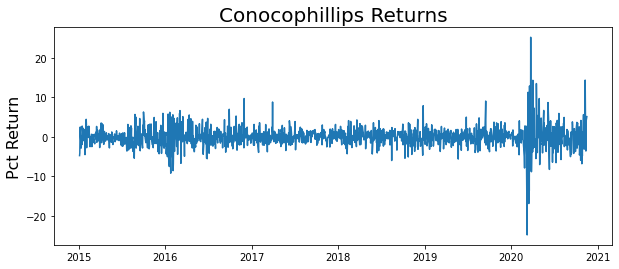

In [24]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Conocophillips Returns', fontsize=20)

**PACF**

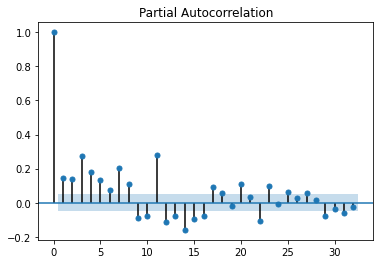

In [25]:
plot_pacf(returns**2)
plt.show()

Fit GARCH(4,4)

In [26]:
model = arch_model(returns, p=4, q=4)

In [27]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 3215.133101034266
Iteration:      2,   Func. Count:     29,   Neg. LLF: 3213.4276948809147
Iteration:      3,   Func. Count:     43,   Neg. LLF: 3212.434322722631
Iteration:      4,   Func. Count:     56,   Neg. LLF: 3205.2055985855127
Iteration:      5,   Func. Count:     70,   Neg. LLF: 3204.8739458830023
Iteration:      6,   Func. Count:     83,   Neg. LLF: 3203.934553327923
Iteration:      7,   Func. Count:     96,   Neg. LLF: 3203.701728747129
Iteration:      8,   Func. Count:    109,   Neg. LLF: 3202.5171628330427
Iteration:      9,   Func. Count:    122,   Neg. LLF: 3202.135325502656
Iteration:     10,   Func. Count:    134,   Neg. LLF: 3201.9622027916703
Iteration:     11,   Func. Count:    147,   Neg. LLF: 3201.527156246487
Iteration:     12,   Func. Count:    159,   Neg. LLF: 3200.454151200323
Iteration:     13,   Func. Count:    171,   Neg. LLF: 3199.7674831702025
Iteration:     14,   Func. Count:    184,   Neg. LLF: 3199

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -3198.84
Distribution:                  Normal   AIC:                           6417.69
Method:            Maximum Likelihood   BIC:                           6470.68
                                        No. Observations:                 1479
Date:                Mon, Nov 16 2020   Df Residuals:                     1469
Time:                        17:06:09   Df Model:                           10
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0261  4.922e-02      0.531      0.595 [-7.033e-02,  0.123]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2531      0.181      1.395      0.163      [ -0.103,  0.609]
alpha[1]       0.1696  5.688e-02      2.982  2.864e-03    [5.813e-02,  0.281]
alpha[2]       0.0547      0.104      0.524      0.600      [ -0.150,  0.259]
alpha[3]       0.0248  3.803e-02      0.652      0.514 [-4.973e-02,9.933e-02]
alpha[4]   1.4595e-10  6.032e-02  2.419e-09      1.000      [ -0.118,  0.118]
beta[1]    3.8501e-10      0.534  7.207e-10      1.000      [ -1.047,  1.047]
beta[2]    2.6116e-09  8.460e-02  3.087e-08      1.000      [ -0.166,  0.166]
beta[3]        0.7193      0.114      6.313  2.739e-10      [  0.496,  0.943]
beta[4]    2.8973e-09      0.387  7.488e-09      1.000      [ -0.758,  0.758]
=============================================================================

Covariance estimator: robust
"""

Try GARCH(1,0) = ARCH(1)

In [29]:
model = arch_model(returns, p=1, q=0)

In [30]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3382.3643336198784
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3369.8199017059383
Iteration:      3,   Func. Count:     21,   Neg. LLF: 3362.271439335865
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3343.0287838491604
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3335.3403155630585
Iteration:      6,   Func. Count:     38,   Neg. LLF: 3332.205878708015
Iteration:      7,   Func. Count:     43,   Neg. LLF: 3331.6187606357907
Iteration:      8,   Func. Count:     48,   Neg. LLF: 3331.5747566381333
Iteration:      9,   Func. Count:     53,   Neg. LLF: 3331.573516799417
Iteration:     10,   Func. Count:     58,   Neg. LLF: 3331.5734765859115
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3331.573476585909
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -3331.57
Distribution:                  Normal   AIC:                           6669.15
Method:            Maximum Likelihood   BIC:                           6685.04
                                        No. Observations:                 1479
Date:                Mon, Nov 16 2020   Df Residuals:                     1476
Time:                        17:06:31   Df Model:                            3
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         4.8804e-04  5.788e-02  8.432e-03      0.993 [ -0.113,  0.114]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.4792      0.310     11.209  3.666e-29 [  2.871,  4.088]
alpha[1]       0.5492      0.119      4.634  3.591e-06 [  0.317,  0.781]
========================================================================

Covariance estimator: robust
"""

Covariance estimator: robust

In [32]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [33]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

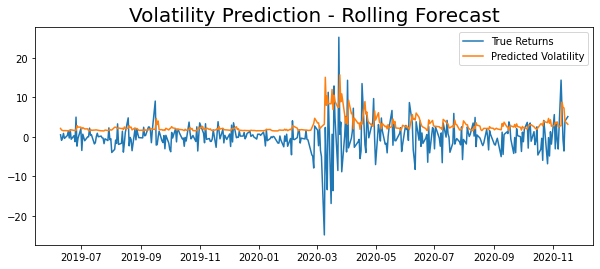

In [34]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10)

**How to use the model**

In [35]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [36]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

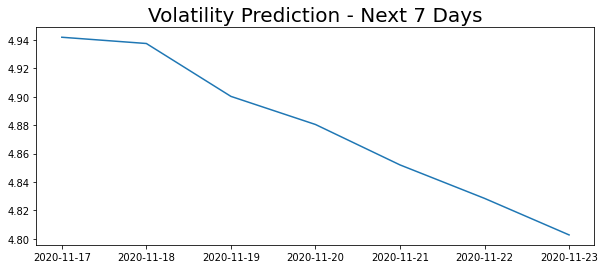

In [37]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)